# ⭐ Segmento ideal de marketing
Objetivo: Classificar o público-alvo em categorias como jovem urbano, família tradicional e executivo.


↪ Criar e salvar o dataset (CSV)

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

data = {
    'Idade': [22, 35, 45, 28, 33, 41, 50, 24, 31, 39]*10,
    'Renda': [2500, 5000, 12000, 3200, 6000, 9000, 15000, 2800, 4500, 11000]*10,
    'Estado_Civil': ['solteiro', 'casado', 'casado', 'solteiro', 'solteiro', 'casado', 'divorciado', 'solteiro', 'casado', 'casado']*10,
    'Tem_Filhos': ['não', 'sim', 'sim', 'não', 'sim', 'sim', 'sim', 'não', 'sim', 'sim']*10,
    'Escolaridade': ['superior', 'médio', 'pós', 'superior', 'pós', 'médio', 'pós', 'médio', 'superior', 'pós']*10,
    'Segmento': ['jovem urbano', 'família tradicional', 'executivo', 'jovem urbano', 'família tradicional', 'executivo', 'executivo', 'jovem urbano', 'família tradicional', 'executivo']*10
}

df = pd.DataFrame(data)
df.to_csv("segmento_marketing.csv", index=False)

↪ Importar e tratar os dados com Pandas + LabelEncoder

In [7]:
df = pd.read_csv("segmento_marketing.csv")

le_estado = LabelEncoder()
le_filhos = LabelEncoder()
le_escolaridade = LabelEncoder()
le_segmento = LabelEncoder()

df['Estado_Civil'] = le_estado.fit_transform(df['Estado_Civil'])
df['Tem_Filhos'] = le_filhos.fit_transform(df['Tem_Filhos'])
df['Escolaridade'] = le_escolaridade.fit_transform(df['Escolaridade'])
df['Segmento'] = le_segmento.fit_transform(df['Segmento'])

↪ Treinando modelo

In [8]:
X = df.drop("Segmento", axis=1)
y = df["Segmento"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

↪ Avaliaçao do modelo

In [9]:
acuracia = accuracy_score(y_test, y_pred)
print(f"\n🎯 Acurácia do modelo: {acuracia:.2f}")
print("\n📋 Relatório de classificação:\n")
print(classification_report(y_test, y_pred, target_names=le_segmento.classes_))


🎯 Acurácia do modelo: 1.00

📋 Relatório de classificação:

                     precision    recall  f1-score   support

          executivo       1.00      1.00      1.00         5
família tradicional       1.00      1.00      1.00         4
       jovem urbano       1.00      1.00      1.00        11

           accuracy                           1.00        20
          macro avg       1.00      1.00      1.00        20
       weighted avg       1.00      1.00      1.00        20



↪ Plot da árvore

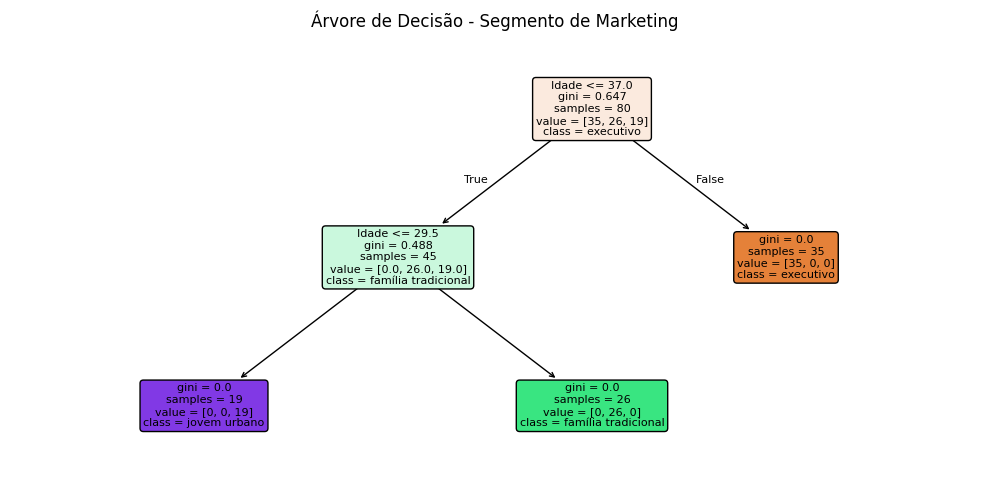

In [15]:
plt.figure(figsize=(10, 5))
plot_tree(
    modelo,
    feature_names=X.columns,
    class_names=le_segmento.classes_,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Árvore de Decisão - Segmento de Marketing")
plt.tight_layout()
plt.show()


↪ Inserção de novos dados

In [18]:
novos_dados = []

for i in range(3):
    print(f"\n🔎 Cadastro {i+1}")
    idade = int(input("Idade: "))
    renda = float(input("Renda mensal: "))

    while True:
        estado = input("Estado civil (solteiro, casado, divorciado): ")
        if estado in le_estado.classes_:
            break
        print("❗ Valor inválido. Tente novamente.")

    while True:
        filhos = input("Tem filhos (sim/não): ")
        if filhos in le_filhos.classes_:
            break
        print("❗ Valor inválido. Tente novamente.")

    while True:
        escolaridade = input("Escolaridade (médio, superior, pós): ")
        if escolaridade in le_escolaridade.classes_:
            break
        print("❗ Valor inválido. Tente novamente.")

    estado_encoded = le_estado.transform([estado])[0]
    filhos_encoded = le_filhos.transform([filhos])[0]
    escolaridade_encoded = le_escolaridade.transform([escolaridade])[0]

    entrada = [[idade, renda, estado_encoded, filhos_encoded, escolaridade_encoded]]
    pred = modelo.predict(entrada)
    segmento = le_segmento.inverse_transform(pred)

    print(f"📌 Segmento previsto: {segmento[0]}")
    novos_dados.append([idade, renda, estado, filhos, escolaridade, segmento[0]])


🔎 Cadastro 1
Idade: 12
Renda mensal: 10
Estado civil (solteiro, casado, divorciado): solteiro
Tem filhos (sim/não): não
Escolaridade (médio, superior, pós): médio


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


📌 Segmento previsto: jovem urbano

🔎 Cadastro 2
Idade: 34
Renda mensal: 12000
Estado civil (solteiro, casado, divorciado): casado
Tem filhos (sim/não): não
Escolaridade (médio, superior, pós): superior


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


📌 Segmento previsto: família tradicional

🔎 Cadastro 3
Idade: 65
Renda mensal: 24000
Estado civil (solteiro, casado, divorciado): divorciado
Tem filhos (sim/não): não
Escolaridade (médio, superior, pós): pós
📌 Segmento previsto: executivo


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


↪ Salvar novos dados simulados

In [17]:
df_novos = pd.DataFrame(novos_dados, columns=['Idade', 'Renda', 'Estado_Civil', 'Tem_Filhos', 'Escolaridade', 'Segmento_Previsto'])
df_novos.to_csv("novos_cadastros.csv", index=False)
print("\n✅ Novos dados salvos em 'novos_cadastros.csv'")


✅ Novos dados salvos em 'novos_cadastros.csv'
